In [3]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ch4_practice"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 1. 수백만 개의 훈련 세트를 가진 훈련 세트에서는 어떤 선형 회귀 알고리즘을 사용?

수백만 개의 특성이 있는 훈련 세트를 가지고 있으면 **확률적 경사 하강법(SGD)** 또는 **미니배치 경사 하강법**을 사용할 수 있다

훈련 세트가 메모리 크기에 맞다면 배치 경사 하강법도 사용 가능하지만 정규 방정식이나 SVD 방법은 계산 복잡도가 특성 개수에 따라서 매우 빠르게 증가하기 때문에 사용할 수 없다

# 2. 훈련 세트에 있는 특성들이 각기 아주 다른 스케일을 가진 경우 이런 데이터에 잘 작동하지 않는 알고리즘? 그 이유는? 해결 방법은?

훈련 세트에 있는 특성 스케일이 매우 바르면 비용 함수 자체가 길쭉한 타원 모양이 된다

따라서 경사 하강법 알고리즘이 수렴하는 데 시간이 오래 걸릴 것이다

이를 해결하기 위해서 **스케일을 조절**해야 하는데, 정규 방정식이나 SVD 방법은 스케일 조정 없이도 잘 작동한다

또한 규제가 있는 모델은 특성의 스케일이 다르면 **지역 최적점**에 수렴할 가능성이 있다

규제는 가중치가 커지지 못하게 제약을 가하므로 특성값이 작으면 큰 값을 가진 특성에 비해 무시되는 경향이 있다

# 3. 경사 하강법으로 로지스틱 회귀 모델을 훈련시킬 때 지역 최솟값에 갇힐 가능성이 있는가?

로지스틱 회귀 모델의 비용 함수는 볼록 함수이므로 가능성이 없다

# 4. 충분히 오랫동안 실행하면 모든 경사 하강법 알고리즘이 같은 모델을 만들어낼 것인가?

최적화할 함수가 선형 회귀나 로지스틱 회귀처럼 볼록 함수이고 학습률이 너무 크지만 않다고 가정하면 결국에는 모든 경사 하강법 알고리즘이 전역 최적값에 도달하고 결국 비슷한 모델을 만들어 낼 것이다

하지만 학습률을 점진적으로 감소시키지 못하면 SGD나 미니배치 GD는 최적점에 정확하게 수렴하지는 못하고 그 주변을 맴돌 것이다

즉, 오랜 시간 훈련해도 조금씩 달라질 것이다

# 5. 배치 경사 하강법을 사용하고 에포크마다 검증 오차를 그래프로 나타냈을 때, 검증 오차가 일정하게 상승하고 있다면 어떤 일이 일어나고 있는 것이며, 어떻게 해결할 수 있을 것인가?

에포크마다 검증 에러가 지속적으로 상승한다면 한 가지 가능성으로는 학습률이 너무 높고 알고리즘이 발산하고 있는 것일 수도 있다

훈련 에러도 올라간다면 이 문제가 확실하고 학습률을 낮춰야 한다

하지만 훈련 에러가 올라가지 않는다면 모델이 훈련 세트에 과대적합되어 있는 것이므로 훈련을 멈추어야 한다

# 6. 검증 오차가 상승하면 미니배치 경사 하강법을 즉시 중단하는 것이 좋은 방법인가?

무작위성 때문에 경사 하강법이나 미니배치 GD 모두 매 훈련마다 학습의 진전을 보장하지는 못한다

검증 에러가 상승할 때 훈련을 즉시 멈춘다면 최적점에 도달하기 전에 너무 일찍 멈추게 될 수도 있다

그 다음 더 나은 방법은 정기적으로 모델을 저장하고 오랫동안 진전이 없을 때(최상의 점수를 넘지 못할 때) 저장된 것 중 가장 좋은 모델로 복원

# 7. 어떤 경사 하강법의 알고리즘이 가장 빠르게 최적 솔루션의 주변에 도달할 것인가? 실제로 수렴하는 것은 어떤 것이며 다른 방법들도 수렴하게 만들 수 있는가?

SGD는 한 번에 하나의 훈련 샘플만 사용하기 때문에 훈련 반복이 가장 빠르고 가장 먼저 전역 최적점 근처에 도달한다

그러나 훈련 시간이 충분하면 배치 경사 하강법만 실제로 수렴하게 된다

따라서 학습률을 점차 감소시키지 않으면 SGD와 미니배치 GD는 최적점 근처를 맴돌게 될 것이다

# 8. 다항 회귀를 사용했을 때 학습 곡선을 보니 훈련 오차와 검증 오차 사이에 간격이 클 때, 무슨 일이 일어난 것이며 이 문제를 해결하는 세 가지 방법은 무엇인가?

모델이 훈련 세트에 과대적합되었을 가능성이 높다

첫 번째 해결 방법으로는 다항 차수를 낮추는 것이다. 자유도를 줄이면 과대적합이 훨씬 줄어든다

두 번째 방법으로는 모델을 규제하는 것이다. 예를 들면 비용 함수에 $l_2$ 패널티(릿지) 또는 $l_1$ 패널티(라쏘)를 추가한다

세 번째 방법은 훈련 세트의 크기를 증가시키는 것이다

# 9. 릿지 회귀를 사용했을 때 훈련 오차와 검증 오차가 거의 비슷하고 둘 다 높은 상황이 발생. 이 모델에는 높은 편향이 문제인가? 높은 분산이 문제인가? 규제 하이퍼 파라미터 $\alpha$를 증가시켜야할 것인가? 줄여야할 것인가

훈련 에러와 검증 에러가 거의 비슷하고 매우 높다면 훈련 세트에 과소적합되었을 가능성이 높다

따라서 규제 하이퍼 파라미터 $\alpha$ 를 감소시켜야 한다

# 10. 다음 3가지가 필요한 이유는 무엇인가?
## - 평범한 선형 회귀 대신 릿지 회귀
## - 릿지 회귀 대신 라쏘 회귀
## - 라쏘 회귀 대신 엘라스틱넷

- 규제가 있는 모델이 일반적으로 규제가 없는 모델보다 성능이 좋기 때문에 평범한 선형 회귀보다 릿지 회귀가 선호된다

- 라쏘 회귀는 $l_1$ 패널티를 사용하여 가중치를 완전히 0으로 만드는 경향이 있다. 즉 가장 중요한 가중치를 제외하고는 모두 0이 되는 희소한 모델을 만든다. 또한 자동으로 특성 선택의 효과를 가지므로 몇 개의 특성만이 유용할 것이라고 의심될 때 사용하면 좋다. 이에 대한 확신이 없다면 릿지 회귀를 사용해야 한다

- 라쏘가 몇 개의 특성이 강하게 연관되어 있거나 훈련 샘플보다 특성이 더 많을 때는 불규칙하게 행동하므로 엘라스틱넷이 라쏘보다 일반적으로 선호된다. 하지만 추가적인 하이퍼 파라미터가 생긴다. 불규칙한 행동이 없는 라쏘를 원하면 엘라스틱넷 $l_1 \text{ratio}$를 1에 가깝게 설정하면 된다

# 11. 사진을 낮과 밤, 실내와 실외로 분류하려고 할 때, 두 개의 로지스틱 회귀 분류기를 만들어야 할 것인가? 하나의 소프트맥스 회귀 분류기를 만들어야 할 것인가?

실외와 실내, 낮과 밤에 따라서 사진을 구분하고 싶다면 이 둘은 배타적인 클래스가 아니기 때문에(네 가지의 조합이 모두 가능하므로) 두 개의 로지스틱 회귀 분류기를 훈련시켜야 한다

# 12. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀 구현(사이킷런을 사용하지 않고)

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [5]:
X = iris['data'][:,(2,3)] # 꽃잎의 길이와 넓이
y = iris['target']

In [6]:
# 편향 추가
X_with_bias = np.c_[np.ones([len(X),1]), X]

In [7]:
np.random.seed(2042)

In [8]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size*test_ratio)
validation_size = int(total_size*validation_ratio)
train_size = total_size- test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]

X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]

X_test = X_with_bias[rnd_indices[test_size:]]
y_test = y[rnd_indices[test_size:]]


타깃은 클래스 인덱스이지만 소프트맥스 회귀 모델을 훈련시키기 위해서는 타깃 클래스의 확률이 필요하다 

각 샘플에서 확률이 1인 타깃 클래스를 제외한 나머지 클래스의 확률은 0(즉, 주어진 샘플에 대한 클래스 확률이 원-핫 벡터)

In [9]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [10]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [11]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [12]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

소프트맥스 함수 만들기

$
\sigma(s(\boldsymbol{x}))_{k} = \dfrac{\text{exp}(s_{k}(\boldsymbol{x}))}{\sum\limits_{j=1}^{K}\text{exp}(s_{j}(\boldsymbol{x}))}
$

In [13]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims = True)
    return exps/exp_sums

In [14]:
n_inputs = X_train.shape[1] # == 3 (특성 2개와 편향)
n_outputs = len(np.unique(y_train))   # == 3 (3개의 붓꽃 클래스)

**비용 함수**

$
J(\Theta) = -\dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}y_{k}^{(i)}\text{log}(\hat{p}^{(i)}_k)
$

**그레이디언트 공식**

$
\nabla_{\theta^{(k)}}J(\Theta) = \dfrac{1}{m}\sum\limits_{i=1}^{m}(\hat{p}^{(i)}_{k}-\hat{y}^{(i)}_{k})\boldsymbol{x}^{(i)}
$

$\hat{p}^{(i)}_{k} =0$이면 $\text{log}(p^{(i)}_k)$를 계산할 수 없기 때문에 `nan`값을 피하기 위해서
$\text{log}(p^{(i)}_k)$값에 아주 작은 값 $\epsilon$ 추가

In [16]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis = 1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients
    

0 6.101695333134016
500 0.7495955964003087
1000 0.6335867601044719
1500 0.5627809964824694
2000 0.5154218410707394
2500 0.48116101400112515
3000 0.45483325048430245
3500 0.4336617868483096
4000 0.4160434121580319
4500 0.40099310107809877
5000 0.38787288168306755


모델 파라미터 확인

In [17]:
Theta

array([[ 3.68653944,  0.10079783, -1.99541063],
       [ 0.33885719,  1.11266289,  0.75252074],
       [-0.85514954,  1.11918494,  3.57304747]])

검증 세트에 대한 예측과 정확도 확인

In [18]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis = 1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

$l_2$ 규제 추가, $\eta$ 증가

In [20]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations) :
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis = 1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0 :
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1,n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta* gradients

0 5.038280239064085
500 0.532220182252098
1000 0.5035315271928776
1500 0.49465903889629925
2000 0.49128501840330063
2500 0.4898942482434113
3000 0.48929688012374906
3500 0.4890341569337251
4000 0.4889169279611999
4500 0.4888641374714865
5000 0.488840222941224


In [21]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

**조기 종료 추가**

매 반복에서 검증 세트에 대한 손실을 계산해서 오차가 증가하기 시작할 때 멈춰야 한다

In [30]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis = 1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis = 1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0 :
        print(iteration, loss)
    if loss < best_loss :
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "조기 종료!")
        break

0 1.294564551656504
500 0.5659196955171946
1000 0.5415409618999446
1500 0.5350058122724648
2000 0.533041336714093
2500 0.5325697535922761
2695 0.5325452438698854
2696 0.5325452448372897 조기 종료!


In [31]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

**전체 데이터셋에 대한 예측**

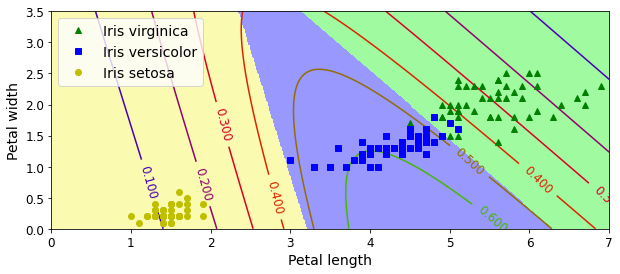

In [32]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [33]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9666666666666667

완벽했던 최종 모델의 성능이 다소 떨어졌는데 이는 데이터셋이 작기 때문이라고 생각할 수 있다